# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colonia
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | lesnoy
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | duki
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | betio village
Processing Record 18 of Set 1 | bopolu
Processing Record 19 of Set 1 | musay'id
City not found. Skipping...
Processing Record 20 of Set 1 | montevideo
Processing Record 21 of Set 1 | blackmans 

Processing Record 40 of Set 4 | kailua-kona
Processing Record 41 of Set 4 | outokumpu
Processing Record 42 of Set 4 | senanga
Processing Record 43 of Set 4 | kapa'a
Processing Record 44 of Set 4 | saint-philippe
Processing Record 45 of Set 4 | peace river
Processing Record 46 of Set 4 | bikenibeu village
Processing Record 47 of Set 4 | ujar
Processing Record 48 of Set 4 | laguna
Processing Record 49 of Set 4 | avarua
Processing Record 0 of Set 5 | mindelo
Processing Record 1 of Set 5 | tambacounda
Processing Record 2 of Set 5 | gamba
Processing Record 3 of Set 5 | melekeok village
Processing Record 4 of Set 5 | kruisfontein
Processing Record 5 of Set 5 | alice springs
Processing Record 6 of Set 5 | romblon
Processing Record 7 of Set 5 | grand gaube
Processing Record 8 of Set 5 | praia
Processing Record 9 of Set 5 | kashgar
Processing Record 10 of Set 5 | klyuchi
Processing Record 11 of Set 5 | labytnangi
Processing Record 12 of Set 5 | sola
Processing Record 13 of Set 5 | leh
Processin

Processing Record 31 of Set 8 | talitsa
Processing Record 32 of Set 8 | tsengel
Processing Record 33 of Set 8 | ar raqqah
Processing Record 34 of Set 8 | burang
Processing Record 35 of Set 8 | antofagasta
Processing Record 36 of Set 8 | la gomera
Processing Record 37 of Set 8 | kuusamo
Processing Record 38 of Set 8 | yantarnyy
Processing Record 39 of Set 8 | antsiranana
Processing Record 40 of Set 8 | gwanda
Processing Record 41 of Set 8 | gilgit
Processing Record 42 of Set 8 | barcelos
Processing Record 43 of Set 8 | shengli
Processing Record 44 of Set 8 | morondava
Processing Record 45 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 46 of Set 8 | sechura
Processing Record 47 of Set 8 | bulata
Processing Record 48 of Set 8 | tshabong
Processing Record 49 of Set 8 | masuguru
Processing Record 0 of Set 9 | karamursel
Processing Record 1 of Set 9 | fort st. john
Processing Record 2 of Set 9 | chamical
Processing Record 3 of Set 9 | margate
Processing Record 4 of Set 9

Processing Record 21 of Set 12 | san luis
Processing Record 22 of Set 12 | motueka
Processing Record 23 of Set 12 | villa gesell
Processing Record 24 of Set 12 | mbandaka
Processing Record 25 of Set 12 | miracema do tocantins
Processing Record 26 of Set 12 | kampung tanjung karang
Processing Record 27 of Set 12 | mahdia
Processing Record 28 of Set 12 | kilinochchi
Processing Record 29 of Set 12 | sinjar
Processing Record 30 of Set 12 | shchyolkino
Processing Record 31 of Set 12 | moranbah
Processing Record 32 of Set 12 | nicoya
Processing Record 33 of Set 12 | longmen
Processing Record 34 of Set 12 | nandurbar
Processing Record 35 of Set 12 | rio grande city
Processing Record 36 of Set 12 | akureyri
Processing Record 37 of Set 12 | amanganj
Processing Record 38 of Set 12 | coahuayana de hidalgo
Processing Record 39 of Set 12 | derzhavinsk
Processing Record 40 of Set 12 | launceston
Processing Record 41 of Set 12 | coari
Processing Record 42 of Set 12 | sao gabriel da cachoeira
Processi

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colonia,50.9333,6.9500,287.02,53,0,5.14,DE,1709402721
1,papatowai,-46.5619,169.4708,282.61,83,68,4.72,NZ,1709402723
2,arraial do cabo,-22.9661,-42.0278,303.13,65,0,6.69,BR,1709402724
3,waitangi,-43.9535,-176.5597,287.49,96,100,0.89,NZ,1709402725
4,hawaiian paradise park,19.5933,-154.9731,294.76,86,0,2.57,US,1709402726


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,287.02,53,0,5.14,DE,1709402721
1,papatowai,-46.5619,169.4708,282.61,83,68,4.72,NZ,1709402723
2,arraial do cabo,-22.9661,-42.0278,303.13,65,0,6.69,BR,1709402724
3,waitangi,-43.9535,-176.5597,287.49,96,100,0.89,NZ,1709402725
4,hawaiian paradise park,19.5933,-154.9731,294.76,86,0,2.57,US,1709402726


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

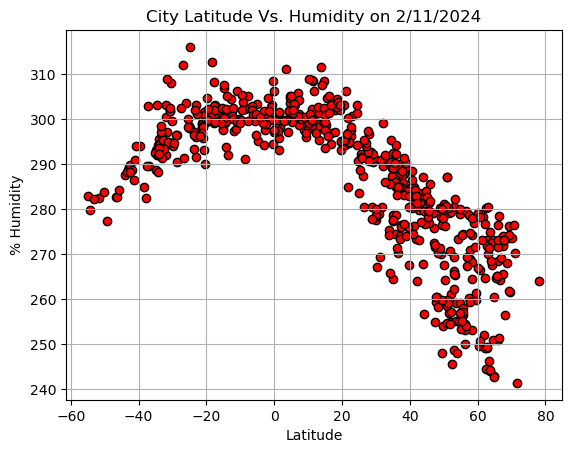

In [13]:
y = city_data_df['Max Temp']
x = city_data_df['Lat']
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")

plt.grid()
plt.title("City Latitude Vs. Humidity on 2/11/2024")
plt.ylabel("% Humidity")
plt.xlabel ("Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

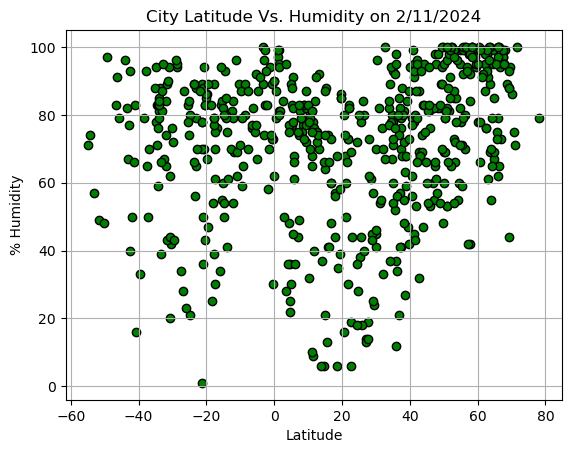

In [14]:
# Build scatter plot for latitude vs. temperature
y = city_data_df['Humidity']
x = city_data_df['Lat']
plt.scatter(x, y, marker="o", facecolors="green", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Humidity on 2/11/2024")
plt.ylabel("% Humidity")
plt.xlabel ("Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

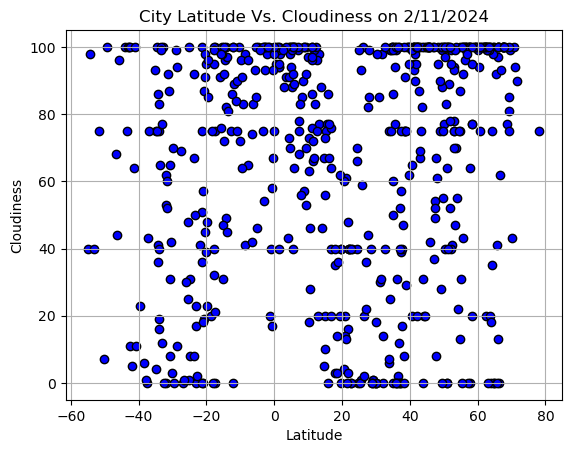

In [15]:
# Build scatter plot for latitude vs. temperature
y = city_data_df['Cloudiness']
x = city_data_df['Lat']
plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Cloudiness on 2/11/2024")
plt.ylabel("Cloudiness")
plt.xlabel ("Latitude")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

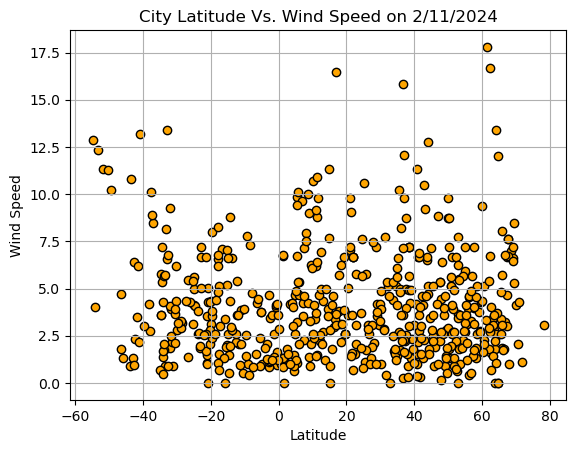

In [22]:
# Build scatter plot for latitude vs. temperature
y = city_data_df['Wind Speed']
x = city_data_df['Lat']
plt.scatter(x, y, marker="o", facecolors="orange", edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Wind Speed on 2/11/2024")
plt.ylabel("Wind Speed")
plt.xlabel ("Latitude")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def regression_plot (x, y, y_col, hemi):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black", alpha=.5)
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq,(min(x), min(y)),fontsize=15,color="red")
    plt.xlabel("Latitude (" + hemi + ")")
    plt.ylabel(y_col)
    print('The r-value is: ' + str(rvalue ** 2))
    plt.show()
    

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colonia,50.9333,6.9500,287.02,53,0,5.14,DE,1709402721
4,hawaiian paradise park,19.5933,-154.9731,294.76,86,0,2.57,US,1709402726
6,bethel,41.3712,-73.4140,281.35,78,100,2.73,US,1709402728
7,lesnoy,57.6198,63.0784,270.96,92,100,3.96,RU,1709402728
8,yellowknife,62.4560,-114.3525,244.49,76,20,6.71,CA,1709402730


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)=Northern Hemi
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,papatowai,-46.5619,169.4708,282.61,83,68,4.72,NZ,1709402723
2,arraial do cabo,-22.9661,-42.0278,303.13,65,0,6.69,BR,1709402724
3,waitangi,-43.9535,-176.5597,287.49,96,100,0.89,NZ,1709402725
5,ushuaia,-54.8000,-68.3000,282.96,71,40,12.86,AR,1709402727
10,port lincoln,-34.7333,135.8667,288.66,78,4,5.79,AU,1709402741


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7105896900138196


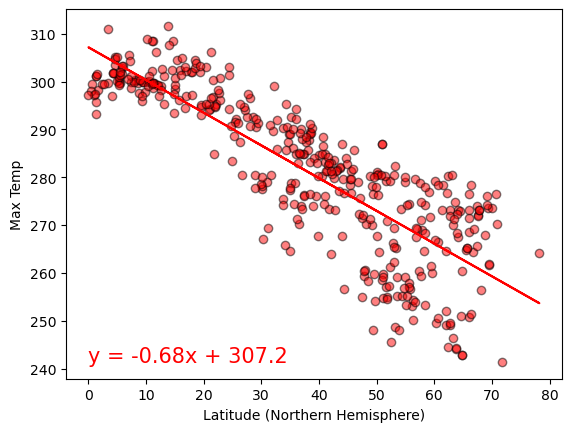

In [32]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"], 'Max Temp', 'Northern Hemisphere')

The r-value is: 0.42827270204218904


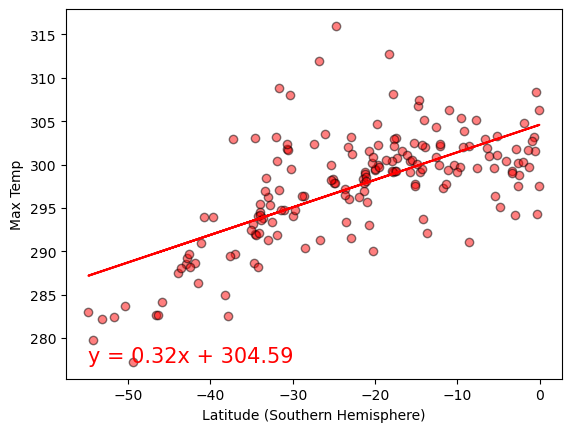

In [33]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"], 'Max Temp', 'Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere : Strong negative correlation between latitude and max temperature. The closer to the equator you get, the warmer the temperature gets.  The r-value is .71 showing a very strong relationship
Southern Hemisphere : Positive correlation between latitude and max temperature. In the Southern Hemisphere the temperature declines the further you get away from the equator, but at a lower rate than in the Northern Hemisphere as demonstrated by the r-value being .42 (less than .5)in the south.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1339392641837607


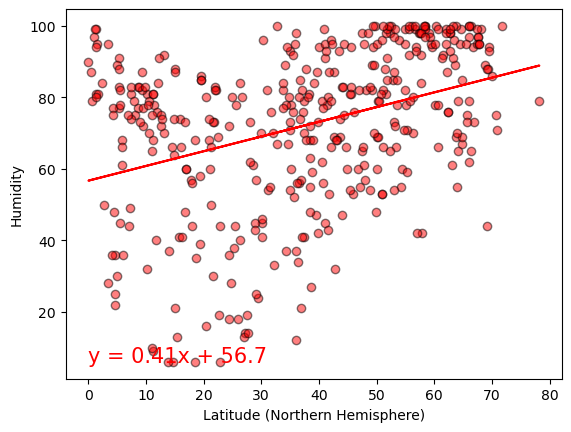

In [34]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 'Northern Hemisphere')

The r-value is: 0.013595796030436274


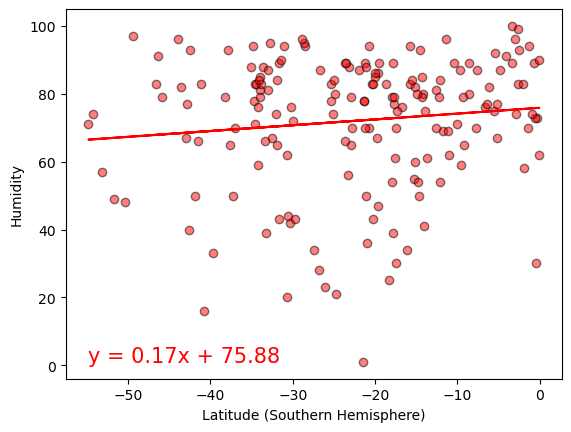

In [36]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', 'Southern Hemisphere')

**Discussion about the linear relationship:** 
Northern Hemisphere :  Positive relationship between humidity and latitude. The r-value is: 0.134 
Southern Hemisphere :  Very slight positive relationship between humidity and latitude - meaning there is more variability between humidity the closer you get to the equator.  The r-value is: 0.013595796030436274.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.011742791281267215


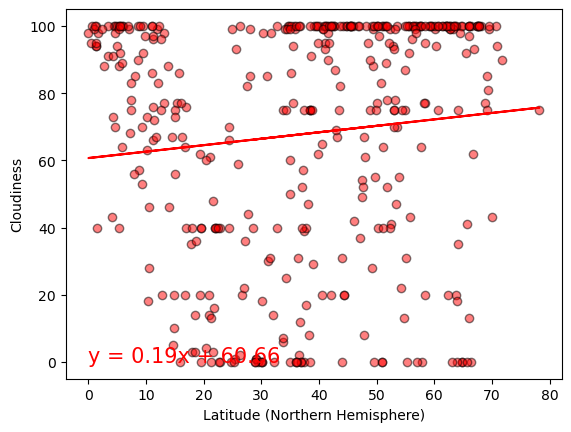

In [38]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 'Northern Hemisphere')

The r-value is: 0.06072540927330683


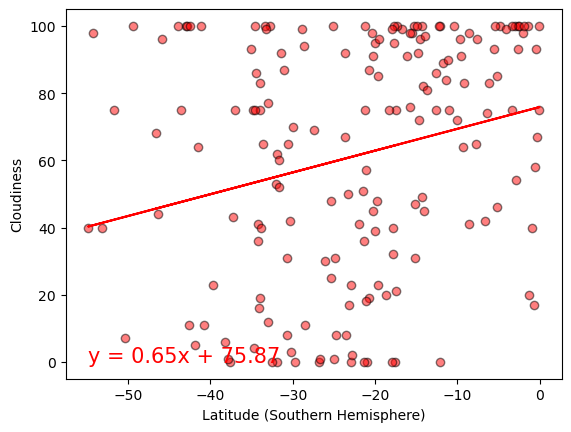

In [42]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', 'Southern Hemisphere')

**Discussion about the linear relationship:** 

Northern Hemisphere : Very slight positive correlation between cloudiness and latitude. The r-value is: 0.01174279128126721. 
Southern Hemisphere : Slight positive correlation between cloudiness and latitude.  The correlation between cloudiness and latitude closer to the eqator is stronger than it is in the Northern Hemisphere.  The r-value is: 0.06072540927330683.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0003977169833871375


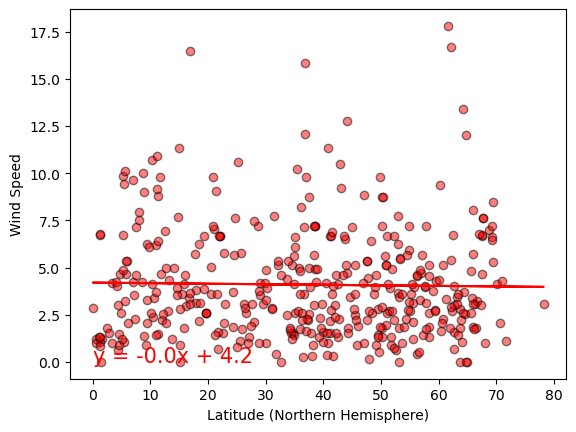

In [43]:
# Northern Hemisphere
regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 'Northern Hemisphere')

The r-value is: 0.14287659749058848


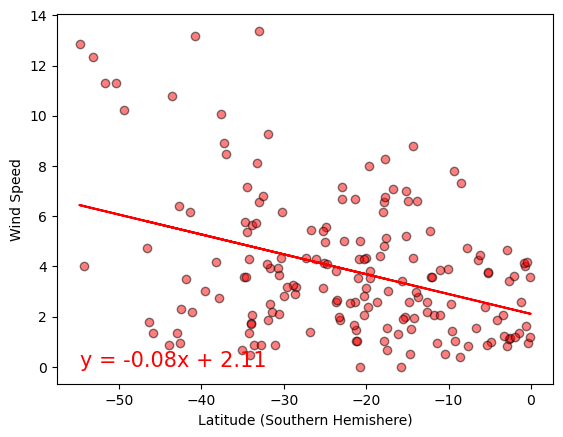

In [45]:
# Southern Hemisphere
regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', 'Southern Hemishere')

**Discussion about the linear relationship:** 

Northern Hemisphere : Very slight negative correlation.  Wind speed seems consistent regardless of where you are in the Northern Hemisphere.
Southern Hemisphere : Very slight negative correlation.  As you get closer to the equator wind speed is less